In [266]:
#Librerias
import numpy as np                 
import pandas as pd                
import seaborn as sns    
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [267]:
data = pd.read_csv("dataset.csv", encoding='latin-1')

In [268]:
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

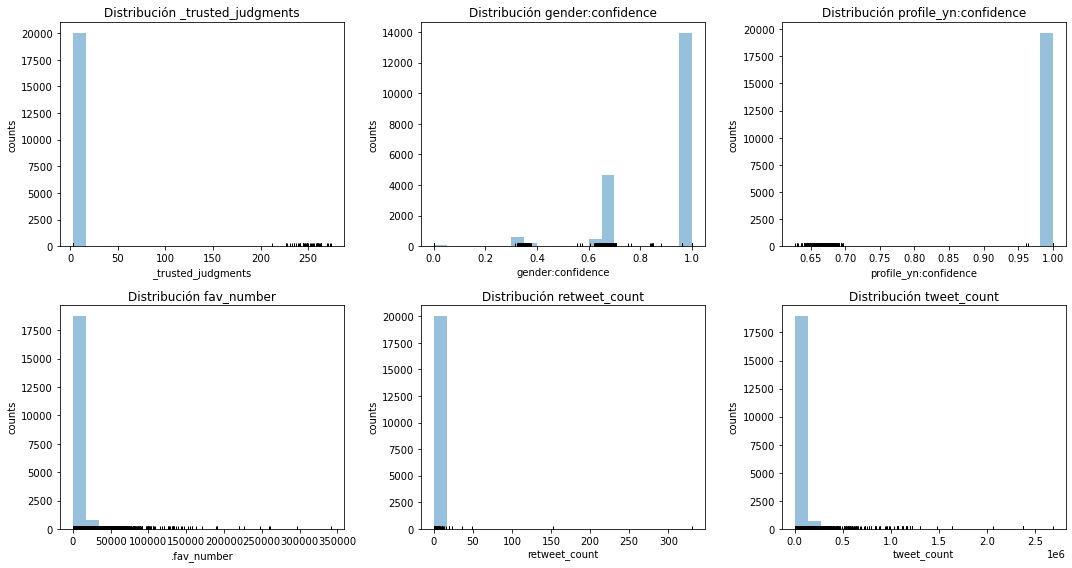

In [270]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

axs[0][0].hist(x=data._trusted_judgments, bins=20, color="#3182bd", alpha=0.5)
axs[0][0].plot(data._trusted_judgments, np.full_like(data._trusted_judgments, -0.01), '|k', markeredgewidth=1)
axs[0][0].set_title('Distribución _trusted_judgments')
axs[0][0].set_xlabel('_trusted_judgments')
axs[0][0].set_ylabel('counts')

axs[0][1].hist(x=data["gender:confidence"], bins=20, color="#3182bd", alpha=0.5)
axs[0][1].plot(data["gender:confidence"], np.full_like(data["gender:confidence"], -0.01), '|k', markeredgewidth=1)
axs[0][1].set_title('Distribución gender:confidence')
axs[0][1].set_xlabel('gender:confidence')
axs[0][1].set_ylabel('counts')

axs[0][2].hist(x=data["profile_yn:confidence"], bins=20, color="#3182bd", alpha=0.5)
axs[0][2].plot(data["profile_yn:confidence"], np.full_like(data["profile_yn:confidence"], -0.01), '|k', markeredgewidth=1)
axs[0][2].set_title('Distribución profile_yn:confidence')
axs[0][2].set_xlabel('profile_yn:confidence')
axs[0][2].set_ylabel('counts')

axs[1][0].hist(x=data.fav_number, bins=20, color="#3182bd", alpha=0.5)
axs[1][0].plot(data.fav_number, np.full_like(data.fav_number, -0.01), '|k', markeredgewidth=1)
axs[1][0].set_title('Distribución fav_number')
axs[1][0].set_xlabel('.fav_number')
axs[1][0].set_ylabel('counts')

axs[1][1].hist(x=data.retweet_count, bins=20, color="#3182bd", alpha=0.5)
axs[1][1].plot(data.retweet_count, np.full_like(data.retweet_count, -0.01), '|k', markeredgewidth=1)
axs[1][1].set_title('Distribución retweet_count')
axs[1][1].set_xlabel('retweet_count')
axs[1][1].set_ylabel('counts')

axs[1][2].hist(x=data.tweet_count, bins=20, color="#3182bd", alpha=0.5)
axs[1][2].plot(data.tweet_count, np.full_like(data.tweet_count, -0.01), '|k', markeredgewidth=1)
axs[1][2].set_title('Distribución tweet_count')
axs[1][2].set_xlabel('tweet_count')
axs[1][2].set_ylabel('counts')


plt.tight_layout();

In [271]:
#Análisis Gráfico Datos
#Variables Cualitativas - Tabla de Frecuencia Variable Objetivo
data["tweet_created"].value_counts()   

10/26/15 12:40    8076
10/26/15 13:19    5892
10/26/15 13:20    3865
10/26/15 12:39    1952
10/26/15 13:18     265
Name: tweet_created, dtype: int64

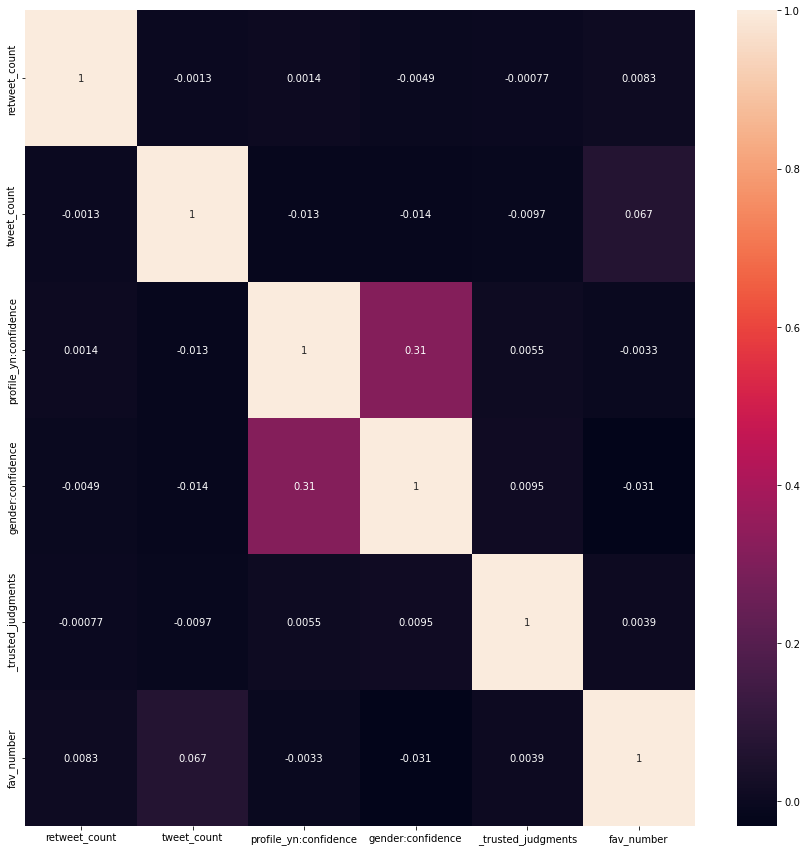

In [272]:
#Matriz de Correlación
column_list = list(set(data.columns)- {"_unit_id","_golden","_unit_state","_last_judgment_a",
                                         "gender","profile_yn","created","description","gender_gold","ink_color",
                                         "name", "profile_yn_gold", "profileimage","sidebar_color","text", 
                                         "tweet_coord","tweet_coord","tweet_id","tweet_location","user_timezone"})
sns.heatmap(data[column_list].corr(),annot = True)
plt.rcParams["figure.figsize"]=15,15

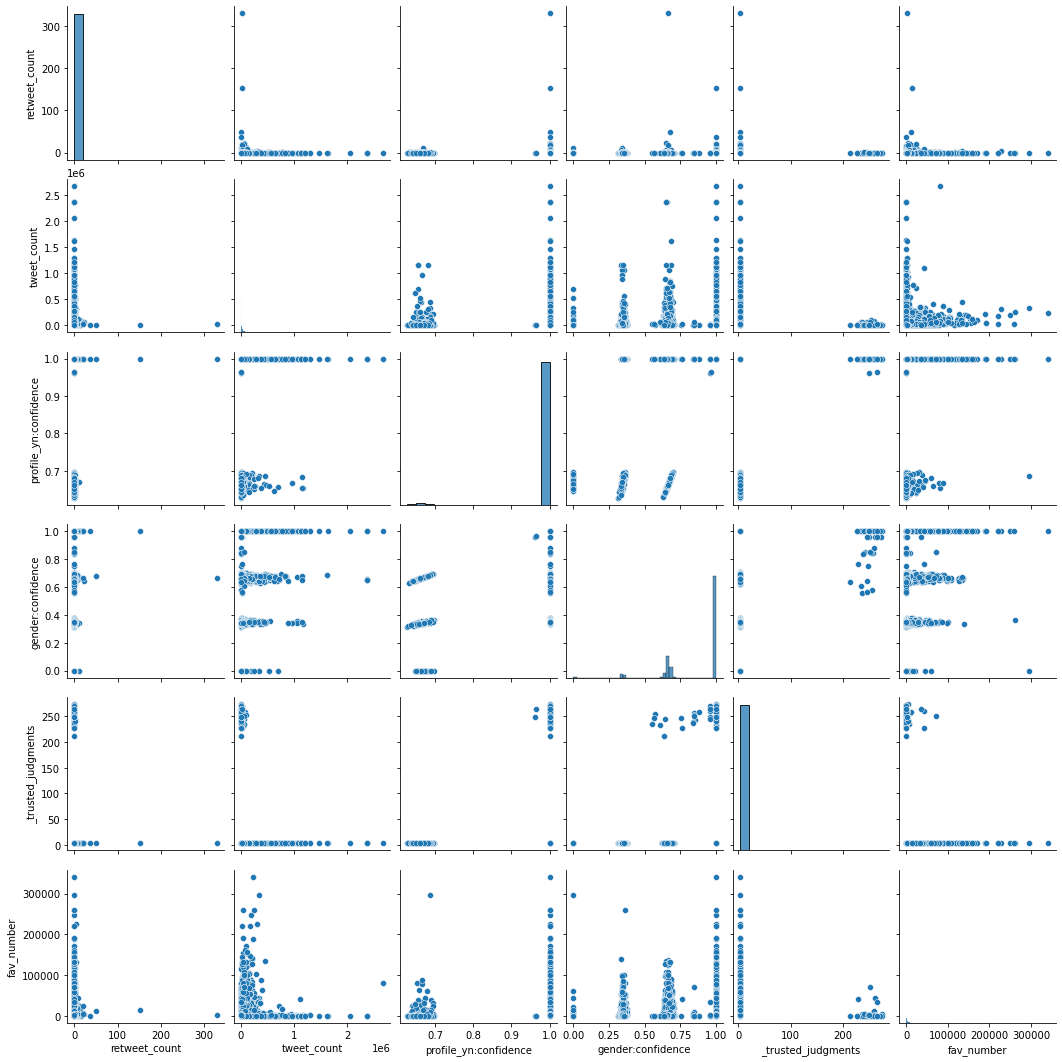

In [273]:
#Análisis Multivariado - Correlación
sns.pairplot(data[column_list])

In [274]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [275]:
data['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [276]:
# Procedimiento de limpieza de los datos

In [277]:
data.isna().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [278]:
data.dropna(axis=0,inplace=True, subset=["gender"])

In [279]:
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [280]:
data.drop(["_unit_id","_golden","_unit_state","_trusted_judgments","_last_judgment_at",
                "gender:confidence","profile_yn","profile_yn:confidence","created","description","gender_gold",
                "name","profile_yn_gold","profileimage","text","tweet_coord","tweet_count","tweet_created",
                "tweet_id","tweet_location","user_timezone"], axis=1, inplace=True)

In [281]:
data.isna().sum()

gender           0
fav_number       0
link_color       0
retweet_count    0
sidebar_color    0
dtype: int64

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19953 entries, 0 to 20049
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         19953 non-null  object
 1   fav_number     19953 non-null  int64 
 2   link_color     19953 non-null  object
 3   retweet_count  19953 non-null  int64 
 4   sidebar_color  19953 non-null  object
dtypes: int64(2), object(3)
memory usage: 935.3+ KB


In [283]:
data["gender"].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [284]:
data = data[(data['gender'] == 'female') | (data['gender'] == 'male')]

In [285]:
data

,gender,fav_number,link_color,retweet_count,sidebar_color
0,male,0,08C2C2,0,FFFFFF
1,male,68,0084B4,0,C0DEED
2,male,7696,ABB8C2,1,C0DEED
3,male,202,0084B4,0,C0DEED
4,female,37318,3B94D9,0,0
...,...,...,...,...,...
20045,female,302,0084B4,0,C0DEED
20046,male,2513,CFB929,0,0
20047,male,50,0084B4,0,C0DEED
20048,female,70804,9266CC,0,0


In [286]:
data["gender"].value_counts() 

female    6700
male      6194
Name: gender, dtype: int64

In [287]:
data["fav_number"].value_counts()

0        722
1        163
2        107
3         95
5         74
        ... 
13261      1
98865      1
9290       1
3490       1
2462       1
Name: fav_number, Length: 5987, dtype: int64

In [288]:
data["link_color"].value_counts()

0084B4    5742
3B94D9     415
9999       404
9266CC     375
DD2E44     358
          ... 
CF0F65       1
D997D9       1
2FC1DE       1
441155       1
05B8CC       1
Name: link_color, Length: 2127, dtype: int64

In [289]:
for color in data["link_color"]:
  if (color!="0084B4" and color!="3B94D9" and color!="9999" and color!="9266CC" and color!="DD2E44" and color!="F5ABB5" and color!="0"):
    data["link_color"].replace({color:"diferente"},inplace=True)

data["link_color"].value_counts() 

/usr/lib/python3/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0084B4       5742
diferente    4976
3B94D9        415
9999          404
9266CC        375
DD2E44        358
F5ABB5        323
0             301
Name: link_color, dtype: int64

In [290]:
for color in data["link_color"]:
  if color=="0084B4":
    data["link_color"].replace({"0084B4":"azul_por_defecto"},inplace=True)

  elif color=="3B94D9":
    data["link_color"].replace({"3B94D9":"azul"},inplace=True)
  
  elif color=="9999":
    data["link_color"].replace({"9999":"verde"},inplace=True)  
  
  elif color=="9266CC":
    data["link_color"].replace({"9266CC":"morado"},inplace=True)

  elif color=="DD2E44":
    data["link_color"].replace({"DD2E44":"rojo"},inplace=True)

  elif color=="F5ABB5":
    data["link_color"].replace({"F5ABB5":"rosado"},inplace=True)

  elif color=="0":
    data["link_color"].replace({"0":"negro"},inplace=True)

data["link_color"].value_counts()

azul_por_defecto    5742
diferente           4976
azul                 415
verde                404
morado               375
rojo                 358
rosado               323
negro                301
Name: link_color, dtype: int64

In [291]:
data["retweet_count"].value_counts() 

0      12497
1        327
2         35
6          8
3          8
5          3
11         2
8          2
7          2
20         2
4          2
23         1
10         1
153        1
49         1
9          1
36         1
Name: retweet_count, dtype: int64

In [292]:
data["sidebar_color"].value_counts()

C0DEED      5252
0           2703
FFFFFF      2662
EEEEEE       479
181A1E       236
            ... 
6.90E+29       1
70808          1
3E0405         1
656869         1
B68B9E         1
Name: sidebar_color, Length: 419, dtype: int64

In [293]:
for color in data["sidebar_color"]:
  if (color!="C0DEED" and color!="0" and color!="181A1E" and color!="FFFFFF" and color!="EEEEEE" and color!="5ED4DC" and color!="CC3366" and color!="A8C7F7" and color!="BDDCAD"):
    data["sidebar_color"].replace({color:"diferente"},inplace=True)

data["sidebar_color"].value_counts()   

C0DEED       5252
0            2703
FFFFFF       2662
diferente    1116
EEEEEE        479
181A1E        236
5ED4DC        143
A8C7F7        142
BDDCAD         83
CC3366         78
Name: sidebar_color, dtype: int64

In [294]:
for color in data["sidebar_color"]:
  if color=="C0DEED":
    data["sidebar_color"].replace({"C0DEED":"azul_por_defecto"},inplace=True)

  elif (color=="0" or color=="181A1E"):
    data["sidebar_color"].replace({"0":"negro"},inplace=True)
    data["sidebar_color"].replace({"181A1E":"negro"},inplace=True)
  
  elif color=="FFFFFF":
    data["sidebar_color"].replace({"FFFFFF":"blanco"},inplace=True)  
  
  elif color=="EEEEEE":
    data["sidebar_color"].replace({"EEEEEE":"gris"},inplace=True)

  elif color=="5ED4DC":
    data["sidebar_color"].replace({"5ED4DC":"azul_claro"},inplace=True)

  elif color=="CC3366":
    data["sidebar_color"].replace({"CC3366":"rosado"},inplace=True)

  elif color=="A8C7F7":
    data["sidebar_color"].replace({"A8C7F7":"azul_oscuro"},inplace=True)

  elif color=="BDDCAD":
    data["sidebar_color"].replace({"BDDCAD":"verde"},inplace=True)
data["sidebar_color"].value_counts()

azul_por_defecto    5252
negro               2939
blanco              2662
diferente           1116
gris                 479
azul_claro           143
azul_oscuro          142
verde                 83
rosado                78
Name: sidebar_color, dtype: int64

In [295]:
data

,gender,fav_number,link_color,retweet_count,sidebar_color
0,male,0,diferente,0,blanco
1,male,68,azul_por_defecto,0,azul_por_defecto
2,male,7696,diferente,1,azul_por_defecto
3,male,202,azul_por_defecto,0,azul_por_defecto
4,female,37318,azul,0,negro
...,...,...,...,...,...
20045,female,302,azul_por_defecto,0,azul_por_defecto
20046,male,2513,diferente,0,negro
20047,male,50,azul_por_defecto,0,azul_por_defecto
20048,female,70804,morado,0,negro


In [297]:
for gen in data["gender"]:

  if gen=="male":

     data["gender"].replace({"male":"1"},inplace=True)

  elif gen=="female":

     data["gender"].replace({"female":"0"},inplace=True)

data["gender"].value_counts()

0    6700
1    6194
Name: gender, dtype: int64

In [298]:
new_data_columns = pd.get_dummies(data.link_color, prefix='link_color_')

In [299]:
data_result = data.join(new_data_columns)

In [300]:
data_result.drop("link_color", axis=1, inplace=True)

In [301]:
new_data_columns = pd.get_dummies(data_result.sidebar_color, prefix='sidebar_color_')

In [302]:
data_result = data_result.join(new_data_columns)

In [303]:
data_result.drop("sidebar_color", axis=1, inplace=True)

In [304]:
data_result

,gender,fav_number,retweet_count,link_color__azul,link_color__azul_por_defecto,link_color__diferente,link_color__morado,link_color__negro,link_color__rojo,link_color__rosado,link_color__verde,sidebar_color__azul_claro,sidebar_color__azul_oscuro,sidebar_color__azul_por_defecto,sidebar_color__blanco,sidebar_color__diferente,sidebar_color__gris,sidebar_color__negro,sidebar_color__rosado,sidebar_color__verde
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,68,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,7696,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,202,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,37318,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,0,302,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20046,1,2513,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20047,1,50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20048,0,70804,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [305]:
data_array_x = np.array(data_result.loc[:,data_result.columns!="gender"])

In [306]:
data_array_x

array([[    0,     0,     0, ...,     0,     0,     0],
       [   68,     0,     0, ...,     0,     0,     0],
       [ 7696,     1,     0, ...,     0,     0,     0],
       ...,
       [   50,     0,     0, ...,     0,     0,     0],
       [70804,     0,     0, ...,     1,     0,     0],
       [ 3348,     0,     0, ...,     0,     0,     0]])

In [307]:
data_array_y=np.array(data_result["gender"])

In [308]:
X_train, X_test, y_train, y_test = train_test_split(data_array_x, data_array_y, test_size=0.2, random_state = 0)

In [309]:
X_train,X_test

(array([[ 1081,     0,     0, ...,     0,     0,     1],
        [    0,     0,     0, ...,     0,     0,     0],
        [11553,     0,     0, ...,     0,     0,     0],
        ...,
        [ 2723,     0,     0, ...,     0,     0,     0],
        [ 3919,     0,     0, ...,     0,     0,     0],
        [   38,     0,     0, ...,     0,     0,     0]]),
 array([[1904,    0,    1, ...,    1,    0,    0],
        [ 452,    1,    0, ...,    1,    0,    0],
        [ 138,    0,    0, ...,    1,    0,    0],
        ...,
        [ 645,    0,    0, ...,    0,    0,    0],
        [ 112,    1,    0, ...,    0,    0,    0],
        [  42,    0,    1, ...,    1,    0,    0]]))

In [310]:
#perceptron
from sklearn.linear_model import Perceptron
rnp = Perceptron(fit_intercept=True, eta0=0.0001, max_iter=1000000, shuffle=False,early_stopping=True,validation_fraction=0.2)
rnp.fit(X_train, y_train)

Perceptron(early_stopping=True, eta0=0.0001, max_iter=1000000, shuffle=False,
           validation_fraction=0.2)

In [311]:
rnp.score(X_train,y_train)

0.4792050412021328

In [312]:
rnp.coef_

array([[ 0.0398,  0.0225,  0.0285,  0.0981, -0.0396, -0.0228,  0.0015,
         0.003 , -0.0416,  0.0333, -0.0009,  0.012 ,  0.0627, -0.0097,
        -0.0265,  0.0092,  0.0211, -0.0102,  0.0027]])

In [313]:
#Capa oculta
from sklearn.neural_network import MLPClassifier

In [314]:
rnco = MLPClassifier(hidden_layer_sizes=(1,19),activation='logistic',learning_rate_init=0.0001,max_iter=1000000, shuffle=False,early_stopping=True,validation_fraction=0.2)
rnco.fit(X_train, y_train)

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(1, 19), learning_rate_init=0.0001,
              max_iter=1000000, shuffle=False, validation_fraction=0.2)

In [315]:
rnco.score(X_train,y_train)

0.47949587978671837

In [316]:
rnco.coefs_

[array([[-0.04870239],
        [ 0.1298296 ],
        [-0.03970687],
        [-0.0258403 ],
        [-0.25580076],
        [ 0.16015292],
        [-0.24989745],
        [ 0.23598503],
        [-0.08782253],
        [ 0.00984608],
        [ 0.01237419],
        [-0.06683601],
        [ 0.06452447],
        [-0.01595353],
        [ 0.0198881 ],
        [-0.30167132],
        [-0.20470699],
        [ 0.04404802],
        [-0.2562014 ]]),
 array([[ 0.28352231,  0.08587558,  0.19052332, -0.27085235,  0.25214011,
          0.10719648, -0.1518767 ,  0.09183798, -0.19779441,  0.31850597,
         -0.10000749,  0.05039355,  0.00959116, -0.22777701,  0.21746937,
          0.17671342,  0.26429353, -0.18412397, -0.11408196]]),
 array([[ 0.26133192],
        [ 0.03948938],
        [ 0.13471334],
        [ 0.17176694],
        [ 0.08362797],
        [ 0.2928402 ],
        [ 0.30039863],
        [ 0.29832453],
        [-0.05416943],
        [-0.16463506],
        [-0.25041321],
        [ 0.05601776],

In [317]:
# Red Neuronal 2 capas
rn2c = MLPClassifier(hidden_layer_sizes=(2,5),activation='logistic',learning_rate_init=0.0001,max_iter=1000000, shuffle=False,early_stopping=True,validation_fraction=0.2)
rn2c.fit(X_train, y_train)

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(2, 5), learning_rate_init=0.0001,
              max_iter=1000000, shuffle=False, validation_fraction=0.2)

In [318]:
rn2c.score(X_train,y_train)

0.47949587978671837

In [319]:
rn2c.coefs_

[array([[-0.1588688 , -0.2602981 ],
        [-0.17994828,  0.17149994],
        [ 0.01105303, -0.00951747],
        [-0.30478268, -0.18586218],
        [-0.25080747, -0.14677857],
        [ 0.21512049, -0.17711392],
        [ 0.15794285,  0.00605896],
        [ 0.2835319 ,  0.22791826],
        [ 0.137085  , -0.17367304],
        [ 0.30610575,  0.25589066],
        [-0.27572332,  0.23246532],
        [-0.2949154 , -0.26557144],
        [-0.29375062,  0.28874756],
        [ 0.04492691,  0.2564267 ],
        [ 0.23253427, -0.28519712],
        [ 0.18121072,  0.14677866],
        [ 0.1804825 , -0.16124377],
        [ 0.06751179, -0.27903016],
        [ 0.09156612,  0.27401943]]),
 array([[-0.29587875,  0.17753365, -0.08306145,  0.16591976,  0.50518995],
        [-0.33693709, -0.50783003, -0.16459177, -0.29332416, -0.31818398]]),
 array([[0.43910671],
        [0.540361  ],
        [0.12163792],
        [0.36949944],
        [0.38254977]])]

In [320]:
from sklearn.metrics import confusion_matrix

In [321]:
confusion_marix_result = confusion_matrix(y_test,rnp.predict(X_test))

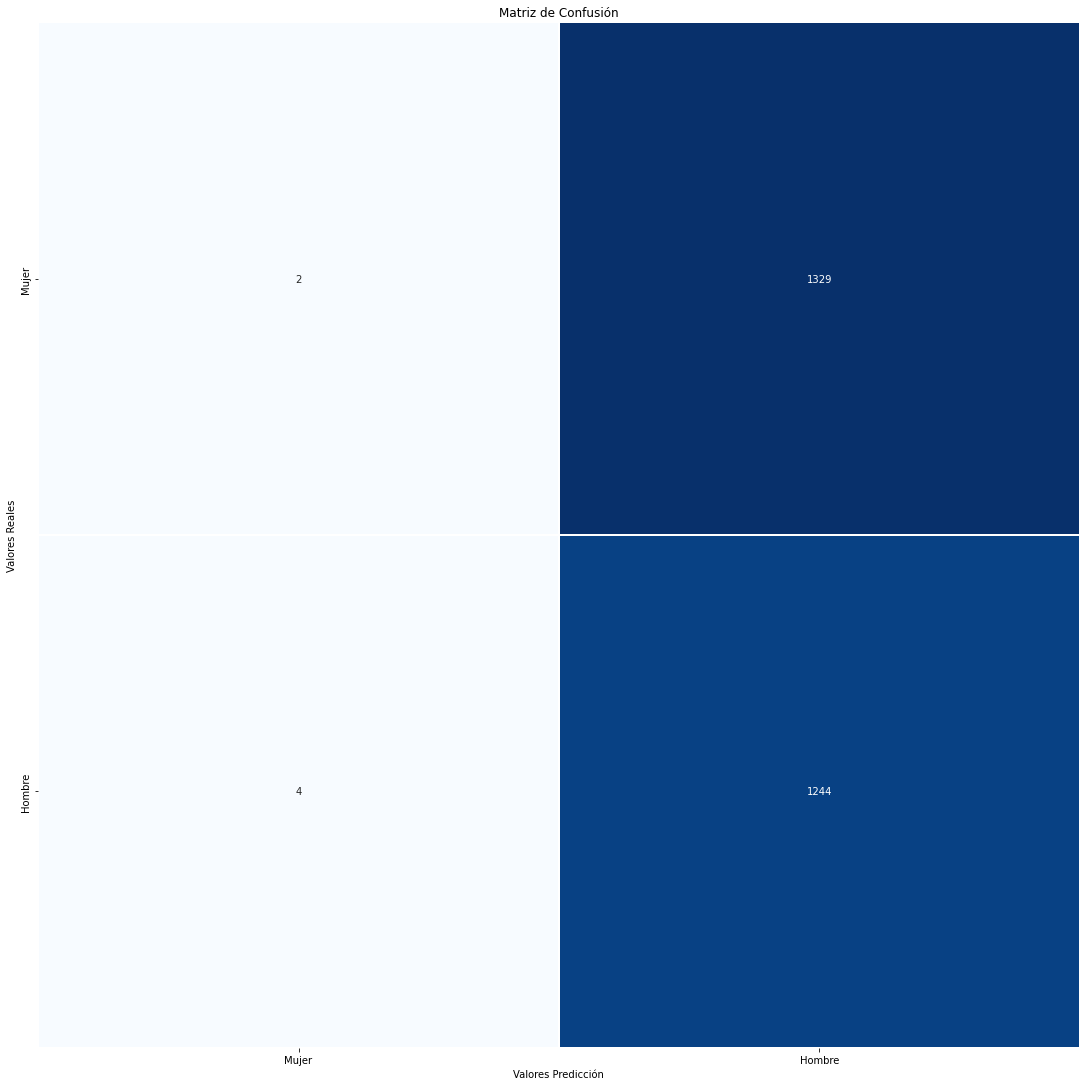

In [341]:
df = pd.DataFrame(confusion_marix_result, index=["Mujer","Hombre"], columns=["Mujer","Hombre"])

sns.heatmap(df, annot=True, cbar=None, cmap="Blues", linewidths=2, fmt='g')
plt.title("Matriz de Confusión"), plt.tight_layout()
plt.ylabel("Valores Reales"), plt.xlabel("Valores Predicción")
plt.show()

In [323]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rnp.predict(X_test))

0.4831329972857697

In [325]:
from sklearn.metrics import precision_score
precision_score(y_test,clf_1.predict(X_test), average=None)

ValueError: X has 19 features, but Perceptron is expecting 2548 features as input.

In [326]:
from sklearn.metrics import recall_score
recall_score(y_test,clf_1.predict(X_test), average=None)

ValueError: X has 19 features, but Perceptron is expecting 2548 features as input.

In [327]:
from sklearn.metrics import f1_score
f1_score(y_test,clf_1.predict(X_test), average=None)

ValueError: X has 19 features, but Perceptron is expecting 2548 features as input.

In [328]:
matrix_2 = confusion_matrix(y_test,rnco.predict(X_test))

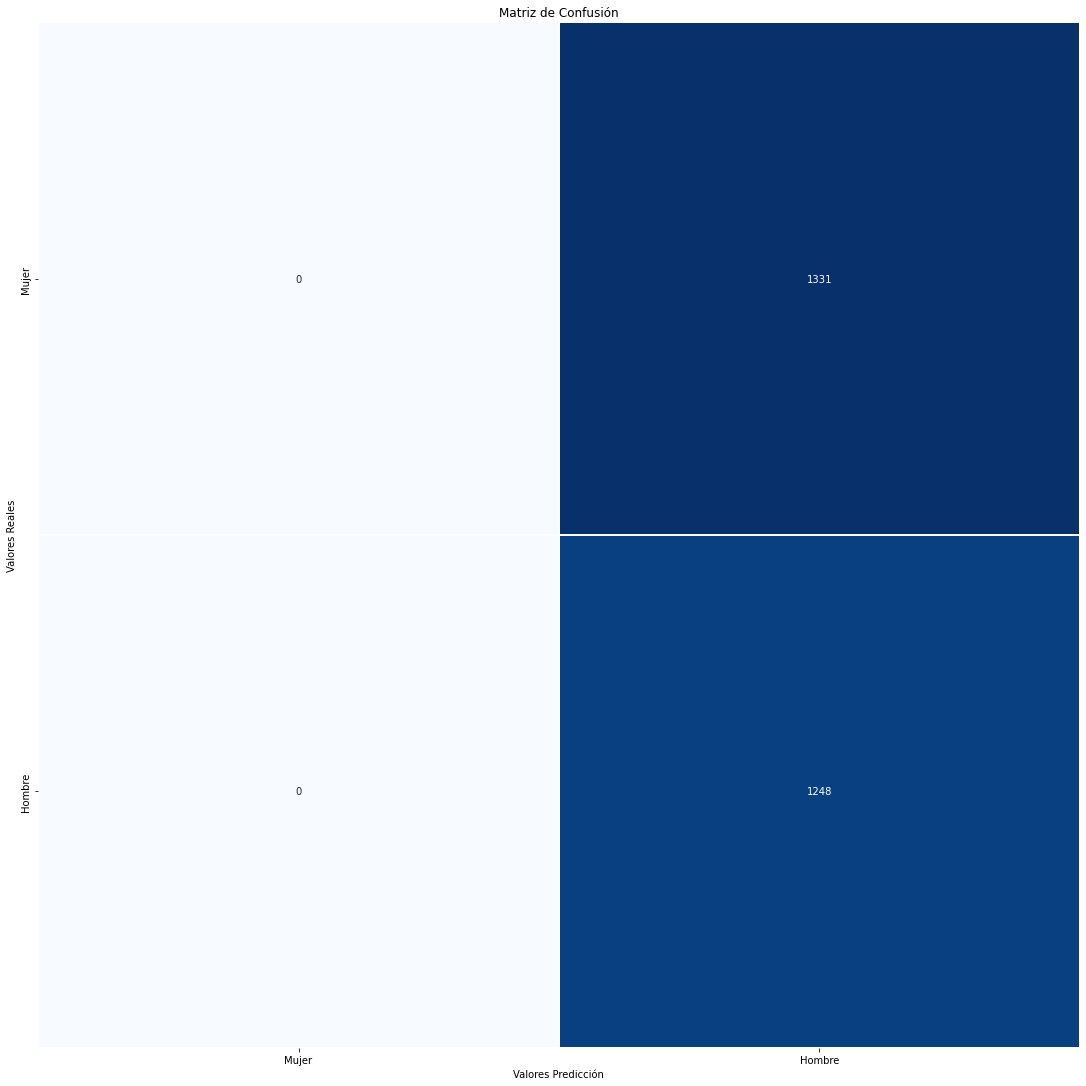

In [329]:
# crear marco de datos de pandas Crear un conjunto de datos
df = pd.DataFrame(matrix_2, index=["Mujer","Hombre"], columns=["Mujer","Hombre"])

# crear mapa de calor dibujar mapa de calor
sns.heatmap(df, annot=True, cbar=None, cmap="Blues", linewidths=2, fmt='g')
plt.title("Matriz de Confusión"), plt.tight_layout()
plt.ylabel("Valores Reales"), plt.xlabel("Valores Predicción")
plt.show()

In [330]:
accuracy_score(y_test,rnco.predict(X_test))

0.4839084916634354

In [331]:
precision_score(y_test,rnco.predict(X_test), average=None)

/home/pr4d4/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.48390849])

In [332]:
recall_score(y_test,rnco.predict(X_test), average=None)

array([0., 1.])

In [333]:
f1_score(y_test,rnco.predict(X_test), average=None)

array([0.      , 0.652208])

In [334]:
matrix_3 = confusion_matrix(y_test,rn2c.predict(X_test))

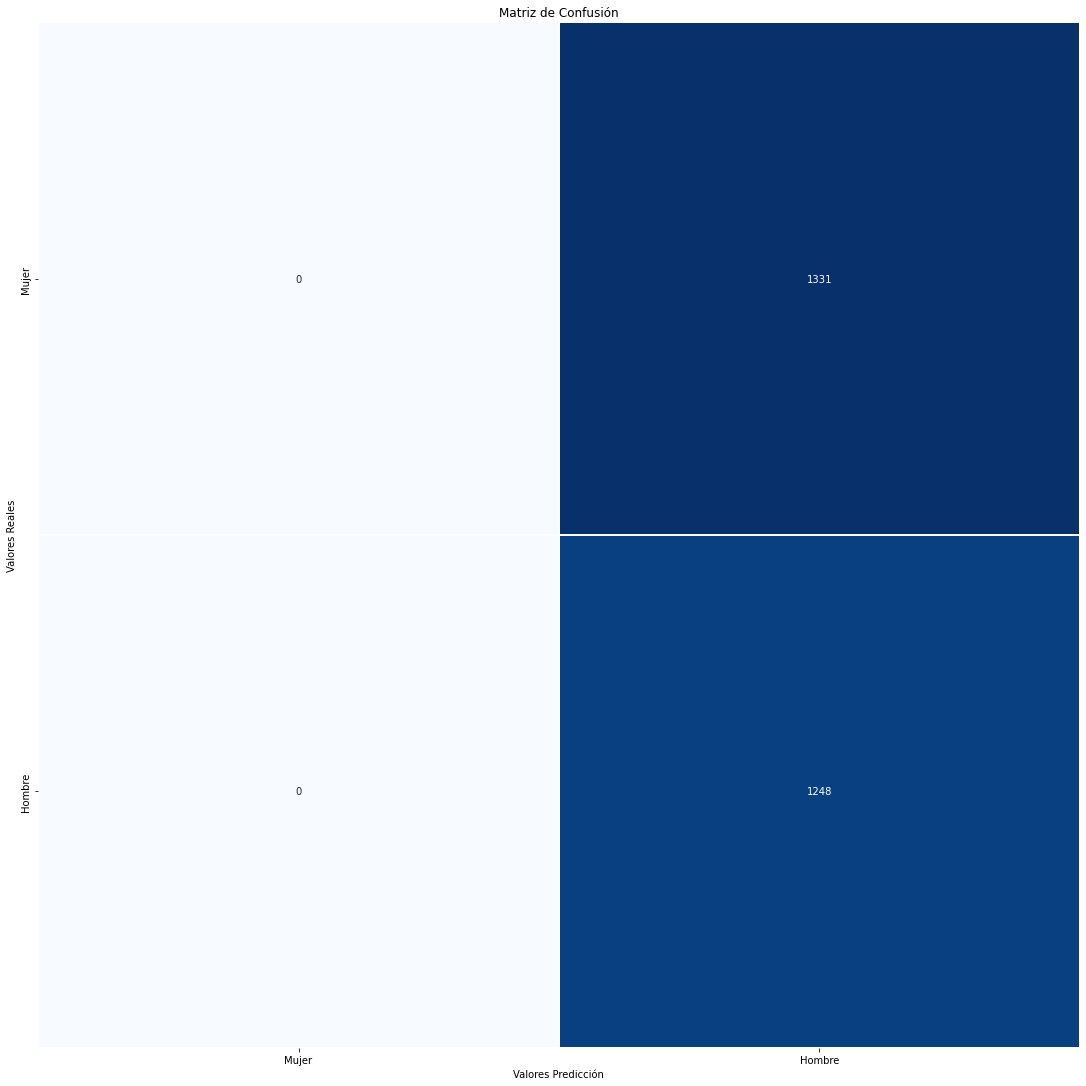

In [335]:
# crear marco de datos de pandas Crear un conjunto de datos
df = pd.DataFrame(matrix_3, index=["Mujer","Hombre"], columns=["Mujer","Hombre"])

# crear mapa de calor dibujar mapa de calor
sns.heatmap(df, annot=True, cbar=None, cmap="Blues", linewidths=2, fmt='g')
plt.title("Matriz de Confusión"), plt.tight_layout()
plt.ylabel("Valores Reales"), plt.xlabel("Valores Predicción")
plt.show()

In [336]:
accuracy_score(y_test,rn2c.predict(X_test))

0.4839084916634354

In [337]:
precision_score(y_test,rn2c.predict(X_test), average=None)

/home/pr4d4/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.48390849])

In [338]:
recall_score(y_test,rn2c.predict(X_test), average=None)

array([0., 1.])

In [339]:
f1_score(y_test,rn2c.predict(X_test), average=None)

array([0.      , 0.652208])